In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [18]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.duplicated().sum()

0

In [22]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [24]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [25]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [26]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [28]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [54]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [57]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()

#model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))# Finetune
model.add(Dense(11,activation='sigmoid'))#Hidden Layer
model.add(Dense(1,activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.7138 - accuracy: 0.4692 - val_loss: 0.6104 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7958 - val_loss: 0.5304 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7958 - val_loss: 0.5099 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7958 - val_loss: 0.5055 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7958 - val_loss: 0.5049 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7958 - val_loss: 0.5048 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969

In [51]:
model.layers[1].get_weights()

[array([[ 0.43627834, -0.34050295,  0.13737231,  0.1679039 ,  0.28532046,
          0.03394043,  0.46791458, -0.08777434, -0.32740512, -0.15744594,
         -0.44734713],
        [-0.06129264,  0.2142831 , -0.44815767, -0.18995526, -0.60934526,
          0.32964236,  0.12525707, -0.3830931 ,  0.1657232 , -0.11641926,
          0.3690729 ],
        [ 0.38232815, -0.15572599,  0.20685586,  0.2923481 ,  0.17973316,
         -0.402144  ,  0.48662835,  0.33940306, -0.3734777 , -0.26298785,
          0.10329042],
        [ 0.1110394 , -0.06850941, -0.08423808,  0.21808732, -0.40898204,
          0.14069873,  0.15904886,  0.29912356, -0.4314117 , -0.2512746 ,
          0.02801908],
        [ 0.19782764, -0.16960844, -0.04417217, -0.01298428,  0.3833806 ,
          0.2772506 , -0.36636406,  0.30651248,  0.37597322, -0.11191982,
         -0.08699155],
        [-0.06357809,  0.34094283,  0.31114432,  0.25658035,  0.17858607,
         -0.17881104,  0.32118386,  0.3271713 ,  0.26147497, -0.1553237

In [62]:
model.layers[0].get_weights()

[array([[ 0.07619203, -0.17117828,  0.09810332,  0.27566153,  0.33669397,
         -0.20929018, -0.24624375,  0.03870648, -0.18657717, -0.08634274,
         -0.36188444],
        [-0.14567426, -0.28794193, -0.18169817,  0.48513526, -0.3427345 ,
          0.34141272,  0.2594244 , -0.32109696,  0.15935868, -0.41093653,
          0.4732365 ],
        [-0.2719623 , -0.2513651 ,  0.23308939,  0.26589495, -0.2831237 ,
          0.23846436,  0.49478358,  0.15520182,  0.17669255, -0.3810067 ,
         -0.39045662],
        [-0.2956385 ,  0.3550223 ,  0.29694498, -0.05432546,  0.46380812,
         -0.29042852,  0.26157779,  0.2664566 ,  0.19604915, -0.18713087,
          0.32050002],
        [ 0.2009538 , -0.14625373,  0.14313123,  0.08625942,  0.12589589,
          0.15869862,  0.18618149, -0.48824066,  0.01485568,  0.31686023,
          0.04946619],
        [-0.13619919,  0.03268713, -0.5034083 ,  0.29352698, -0.30585527,
          0.06710541, -0.14521518,  0.05805624,  0.42764693,  0.2658132

In [63]:
y_pred = model.predict(X_test)

In [64]:
y_pred

array([[0.20306039],
       [0.20306039],
       [0.20306039],
       ...,
       [0.20306039],
       [0.20306039],
       [0.20306039]], dtype=float32)

In [65]:
y_pred = y_pred.argmax(axis=-1)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

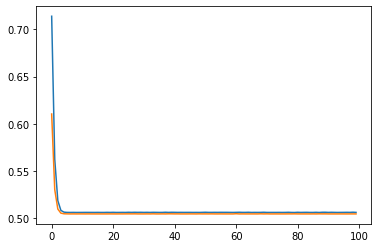

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

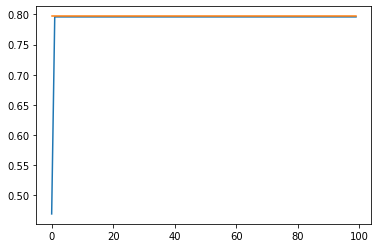

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])